In [ ]:
# This is an analysis of Sea Level: a FreeCodeCamp capstone project 

In [1]:
# importing in the necessary libraries 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline


In [2]:
# Reading the CSV file 
df = pd.read_csv(r'C:\Users\HP\Desktop\Python Projects\boilerplate-sea-level-predictor-2\epa-sea-level.csv')

In [3]:
# Getting a brief overview of the data 
df.info

<bound method DataFrame.info of      Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0    1880                  0.000000          -0.952756           0.952756   
1    1881                  0.220472          -0.732283           1.173228   
2    1882                 -0.440945          -1.346457           0.464567   
3    1883                 -0.232283          -1.129921           0.665354   
4    1884                  0.590551          -0.283465           1.464567   
..    ...                       ...                ...                ...   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.661417   
133  2013                  8.980315           8.622047           9.338583   

     NOAA Adjusted Sea Level  
0           

In [4]:
#Taking a brief look at the data 
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [5]:
# Looking at the top 5 rows
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


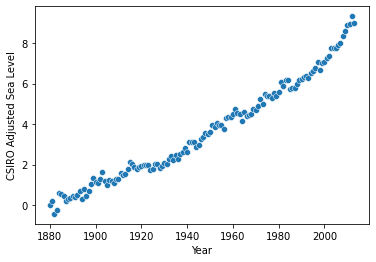

In [6]:
# Seaborn scatterplot-- https://seaborn.pydata.org/generated/seaborn.scatterplot.html

df_scatter = sns.scatterplot(data=df, x="Year", y="CSIRO Adjusted Sea Level")

In [9]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
#plt.scatter(x, y)

In [10]:
# Find slope and Intercept = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

slope, intercept, r_value, p_value, stderr = linregress(x, y)

#print("slope: %f    intercept: %f" % (slope, intercept))

In [11]:
# Need to determine sea level in 2050
#https://www.nuomiphp.com/eplan/en/188182.html
# FCC Help--- https://forum.freecodecamp.org/t/sea-level-predictor/413930/3


x1 = list(range(1880, 2050))
y1 = []
for year in x1:
    y1.append(intercept + slope*year)


Text(0.5, 1.0, 'Rise in Sea Level')

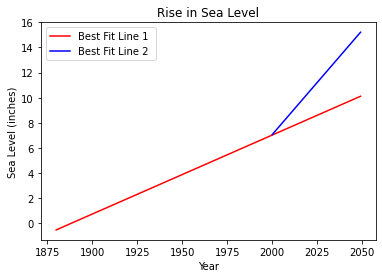

In [12]:
# Plotting graph ---- importing to complete the plots in one, or it will not show up correctly

#plt.plot(x, y, 'o', label='original data', color = 'green') # The original data--- won't pass the test if ran with this
plt.plot(x1, y1, 'r', label='Best Fit Line 1 ', color = 'red')

#Getting a new slope and intercept using data from 2000-2013, then using that new information to plot to 2050

#https://forum.freecodecamp.org/t/sea-level-predictor-final-check/413990/4

xcurrent = df[df['Year'] >= 2000]['Year']
ycurrent = df[df['Year'] >= 2000]['CSIRO Adjusted Sea Level']

# Calculating the new values for slope, intercept, and r
fit2 = linregress(xcurrent, ycurrent)
slope2 = fit2.slope
intercept2 = fit2.intercept

xfuture = list(range(2000, 2050))
yfuture = []
for xcurrent in xfuture:
    yfuture.append(intercept2 + slope2*xcurrent)

# Plot the 2nd Best Fit Line
plt.plot(xfuture, yfuture, 'r', label = 'Best Fit Line 2', color='blue')
plt.legend()

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

In [ ]:
# Learning! One step at a time! 